In [107]:
import pdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda, u_parallelise as u_par
import datetime
import salem
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map
import shapely.geometry as shpg
import glob
import pickle as pkl
import os
import multiprocessing
import ipdb
from metpy import calc
from metpy.units import units

pylab.rcParams['figure.figsize'] = (25., 25.)
%matplotlib inline

In [106]:
cd ..

/home/ck/pythonWorkspace


In [108]:
basefiles = cnst.network_data+ 'data/LMCS/CP4_study_saves/'

In [182]:
im = xr.open_mfdataset('/media/ck/LStorage/global_water/other/CP4/CP4_WestAfrica/CP4hist/SM/*_200008*.nc')['SM']
im_fut = xr.open_mfdataset('/media/ck/LStorage/global_water/other/CP4/CP4_WestAfrica/CP4fut/sh/*_200008*.nc')['sh']

In [183]:
imdayfull = im.squeeze().resample(time='D').mean() #.sel(depth=0.05).squeeze().resample(time='D').mean()
imdayfull_fut = im_fut.squeeze().resample(time='D').mean()

In [186]:
imday = imdayfull.sel(latitude=slice(4.5,20))
imday_fut = imdayfull_fut.sel(latitude=slice(4.5,20))

In [191]:
anom = imday - imday.mean('time')

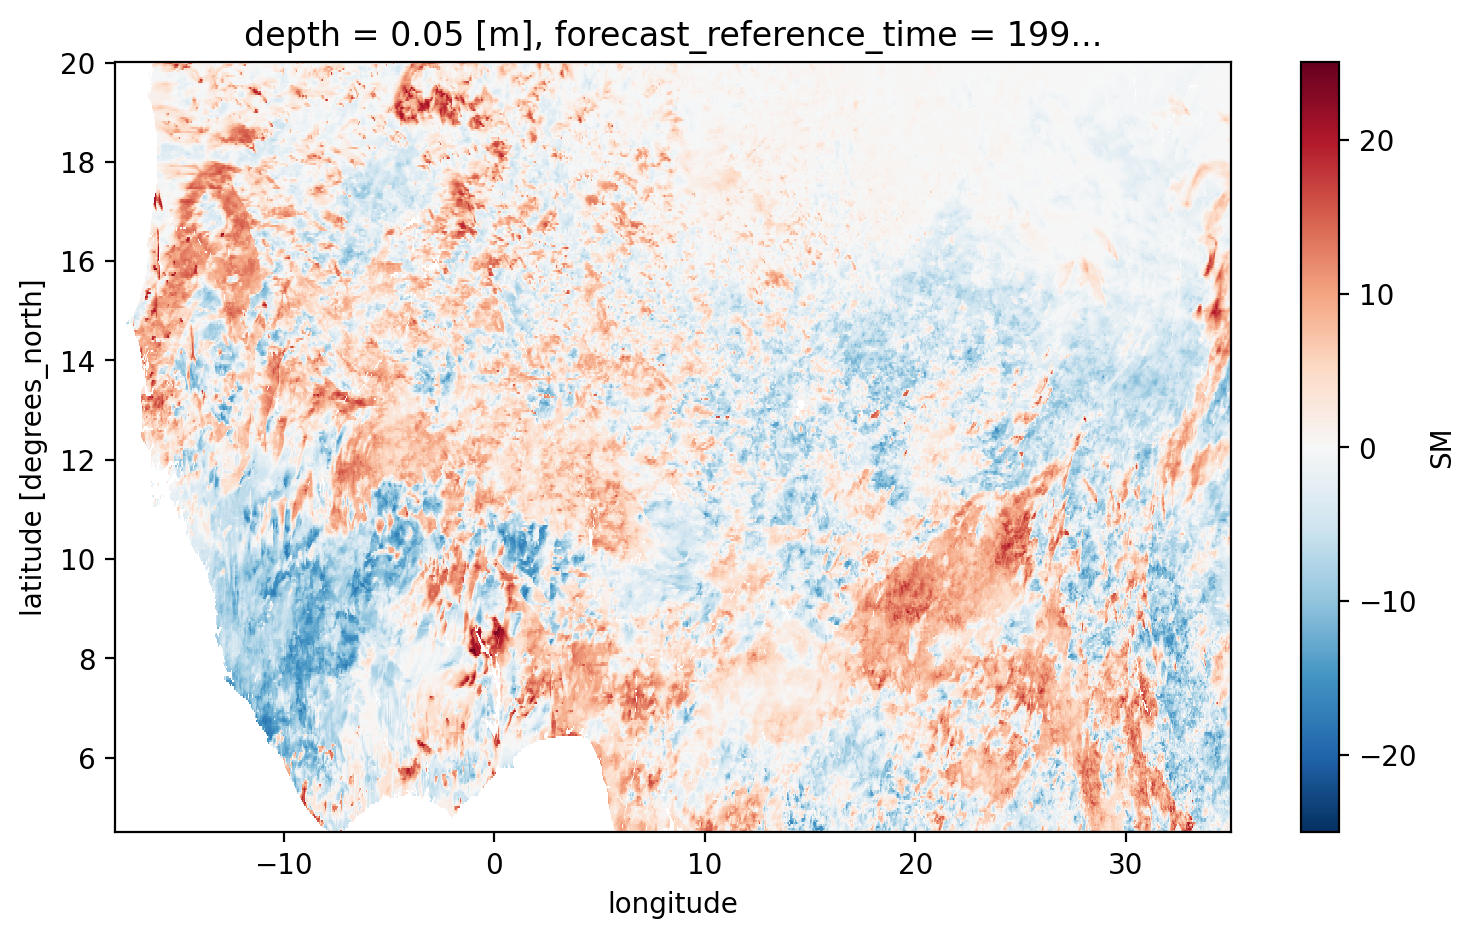

In [194]:
f = plt.figure(figsize=(9,5), dpi=200)
anom.isel(time=1).sel(depth=0.05).plot()

In [176]:
corr = []
corr_fut = []
for idx in np.arange(len(imday.time.values)):
    
    pears_fut = xr.corr(imday_fut.isel(time=0), imday_fut.isel(time=idx))
    pears = xr.corr(imday.isel(time=0), imday.isel(time=idx))
    corr.append(pears.values)
    corr_fut.append(pears_fut.values)


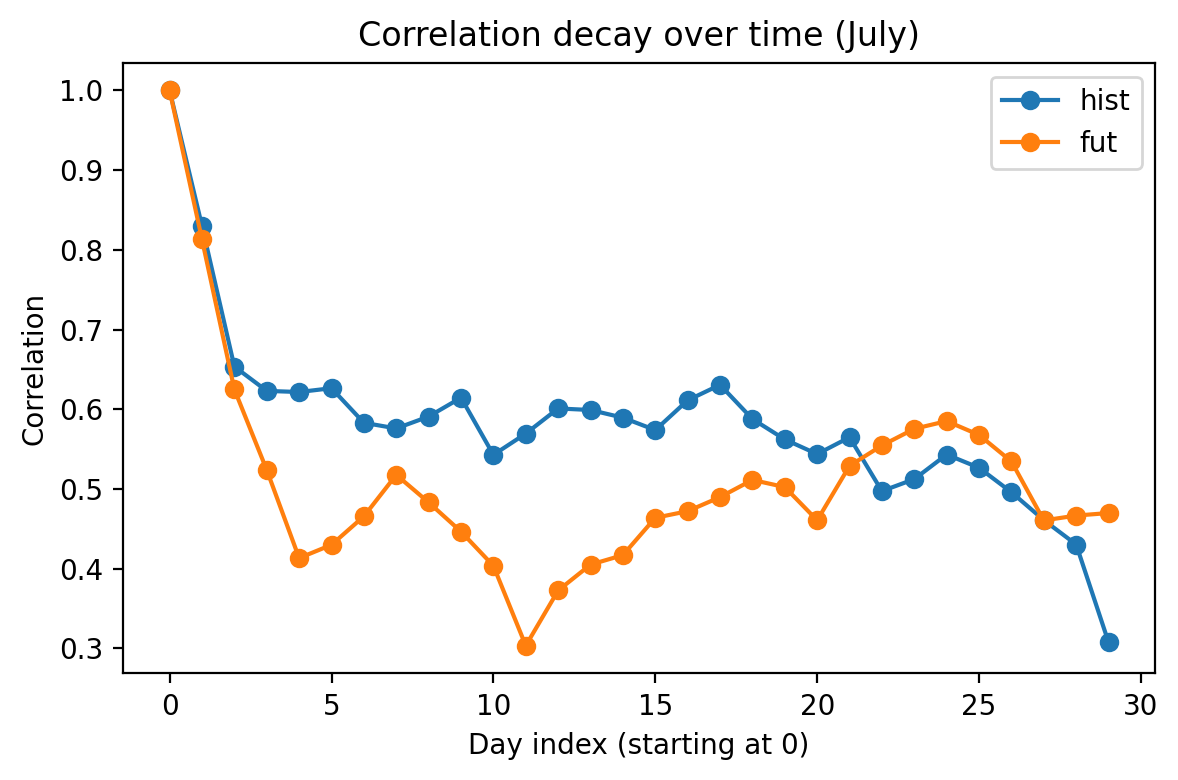

In [170]:
f = plt.figure(figsize=(6,4), dpi=200)
ax = f.add_subplot(111)
plt.plot(np.arange(len(corr)), corr, marker='o', label='hist')
plt.plot(np.arange(len(corr_fut)), corr_fut, marker='o', label='fut')
plt.xlabel('Day index (starting at 0)')
plt.ylabel('Correlation')
ax.set_title('Correlation decay over time (July)')
left, bottom, width, height = [0.65, 0.6, 0.2, 0.2]

plt.tight_layout()
plt.legend()
#f.savefig('/home/ck/DIR/cornkle/figs/Marian/corr_strip.jpg')

/tmp/ipykernel_21375/230801621.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


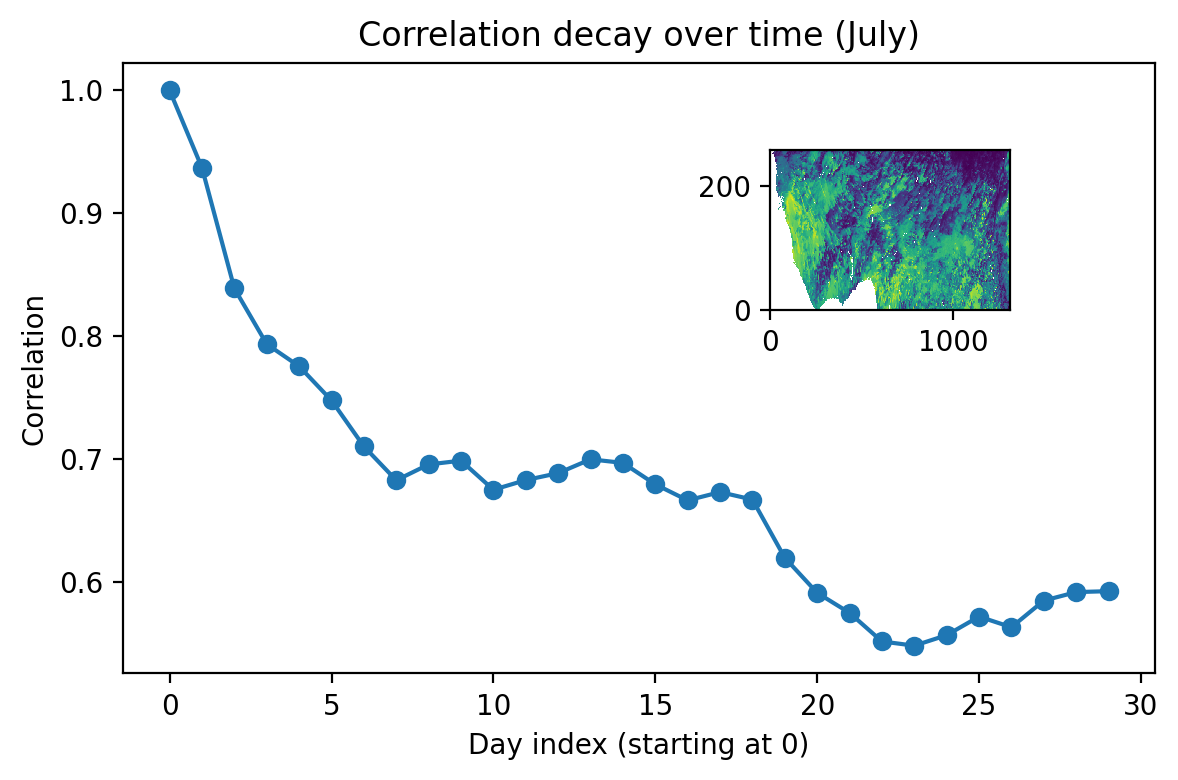

In [156]:
f = plt.figure(figsize=(6,4), dpi=200)
imday = imdayfull.sel(latitude=slice(8,15))
ax = f.add_subplot(111)
plt.plot(np.arange(len(corr)), corr, marker='o')
plt.xlabel('Day index (starting at 0)')
plt.ylabel('Correlation')
ax.set_title('Correlation decay over time (July)')
left, bottom, width, height = [0.65, 0.6, 0.2, 0.2]
ax2 = f.add_axes([left, bottom, width, height])
# g = imday.isel(time=0).plot.pcolormesh(label=None)
# g.axes.set_title("")
# g.axes.set_ylabel("")
# g.axes.set_xlabel("")

ax2.pcolormesh(imday.isel(time=0))
plt.tight_layout()
#f.savefig('/home/ck/DIR/cornkle/figs/Marian/corr_strip.jpg')

ValueError: For X (173) and Y (5) with flat shading, A should have shape (4, 172, 3) or (4, 172, 4) or (4, 172) or (688,), not (4, 172, 1309)

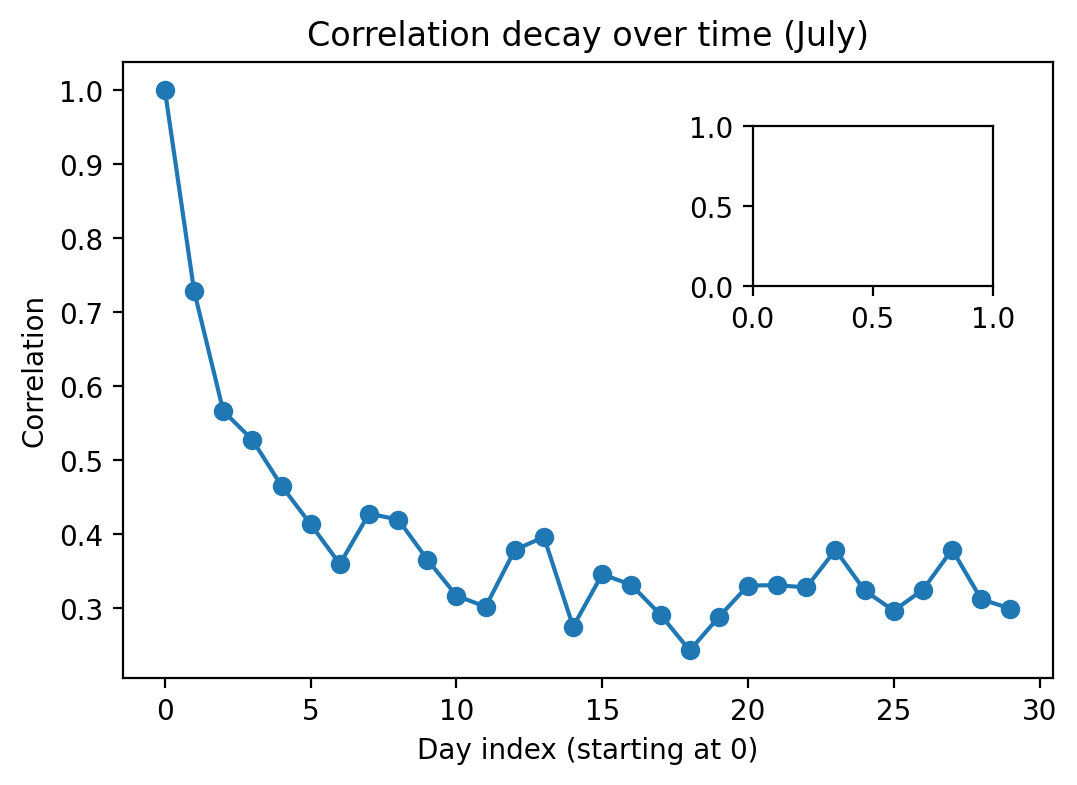

In [195]:
f = plt.figure(figsize=(6,4), dpi=200)
imday = imdayfull.sel(latitude=slice(8,15))
ax = f.add_subplot(111)
plt.plot(np.arange(len(corr)), corr, marker='o')
plt.xlabel('Day index (starting at 0)')
plt.ylabel('Correlation')
ax.set_title('Correlation decay over time (July)')
left, bottom, width, height = [0.65, 0.6, 0.2, 0.2]
ax2 = f.add_axes([left, bottom, width, height])
# g = imday.isel(time=0).plot.pcolormesh(label=None)
# g.axes.set_title("")
# g.axes.set_ylabel("")
# g.axes.set_xlabel("")

ax2.pcolormesh(imday.isel(time=0))
plt.tight_layout()
#f.savefig('/home/ck/DIR/cornkle/figs/Marian/corr_strip.jpg')

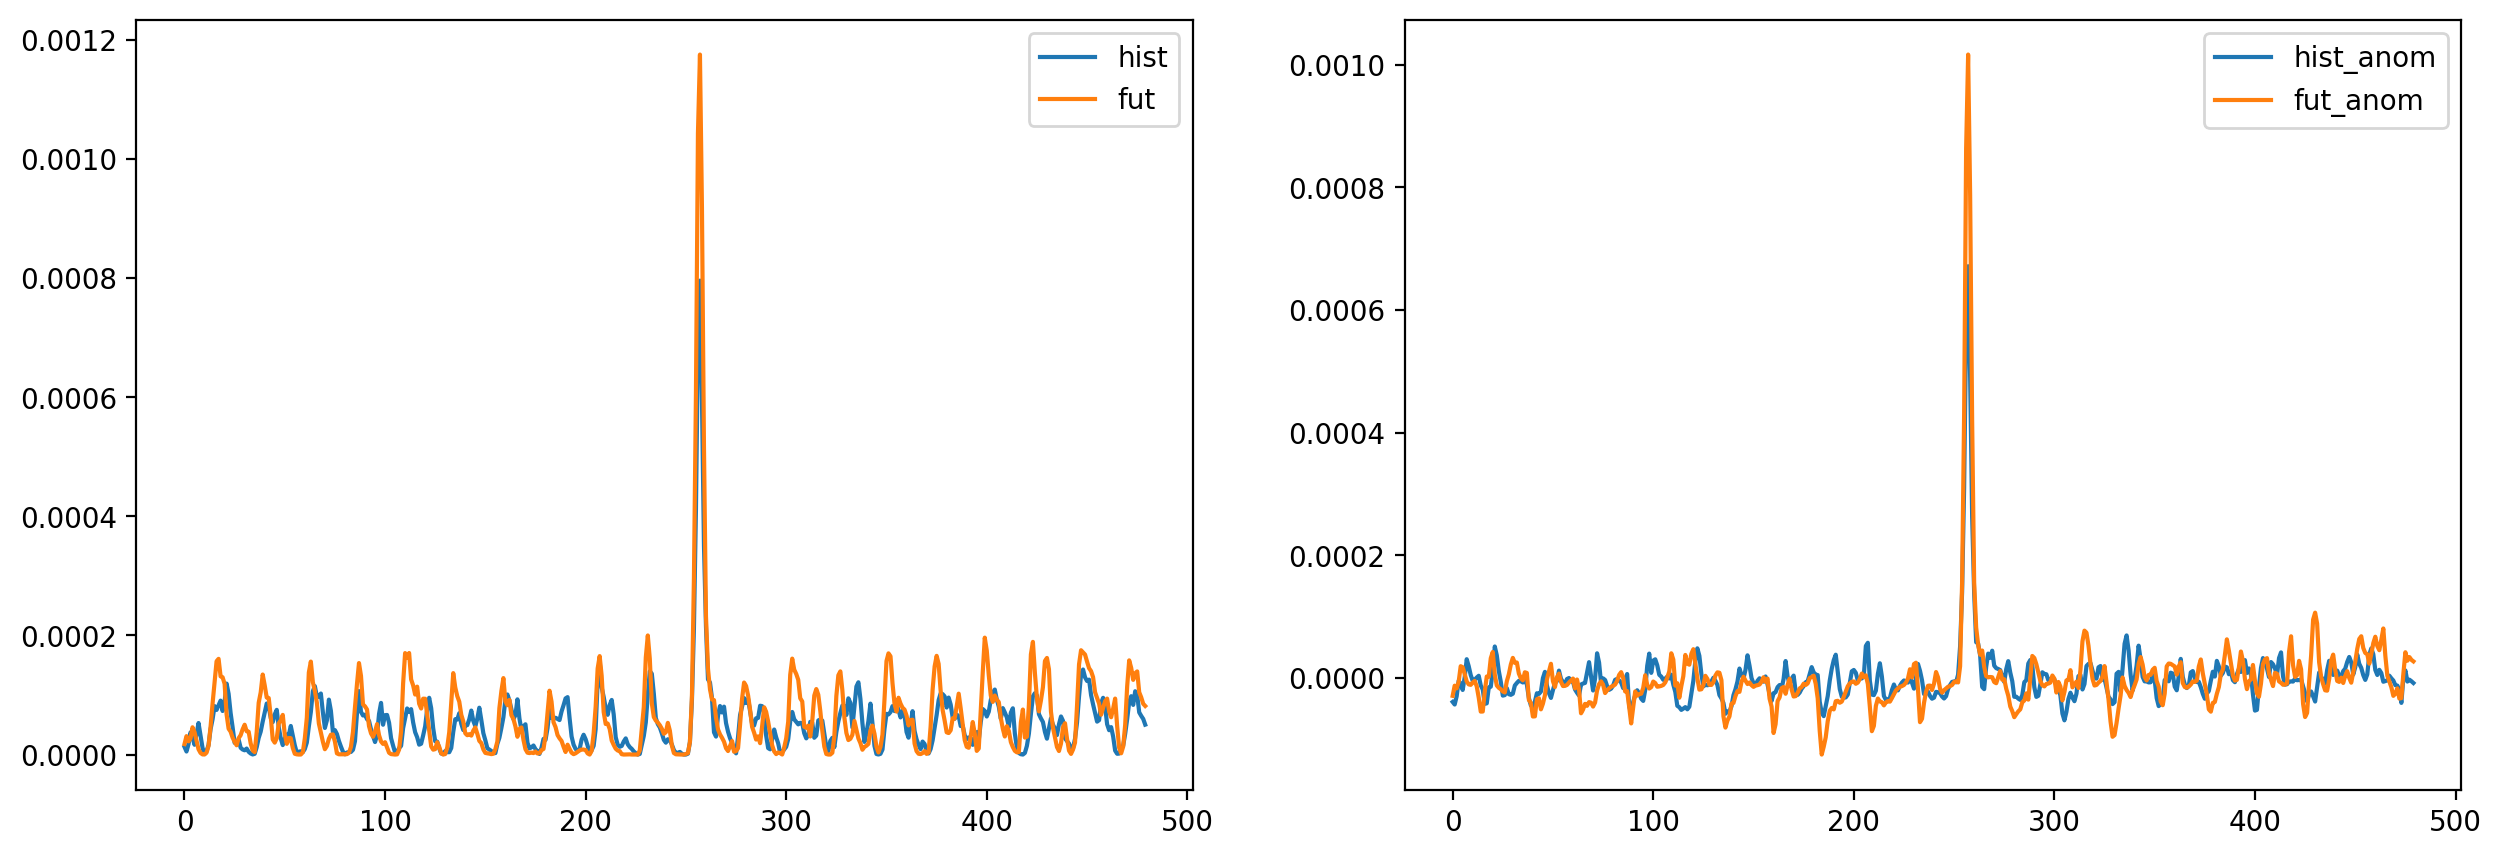

In [25]:
var = 'lsRain'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_timeseries_*_'+str(h)+'.p')[0], 'rb'))
anom = pkl.load(open(glob.glob(basefiles + var + '_anom_timeseries_*_'+str(h)+'.p')[0], 'rb'))
hist = np.mean(mean['CP4hist'], axis=0)
fut = np.mean(mean['CP4fut'], axis=0)
f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
plt.plot(hist, label='hist')
plt.plot(fut, label='fut')
plt.legend()


hist = np.mean(anom['CP4hist'], axis=0)
fut = np.mean(anom['CP4fut'], axis=0)
ax = f.add_subplot(122) 
plt.plot(hist, label='hist_anom')
plt.plot(fut, label='fut_anom')
plt.legend()

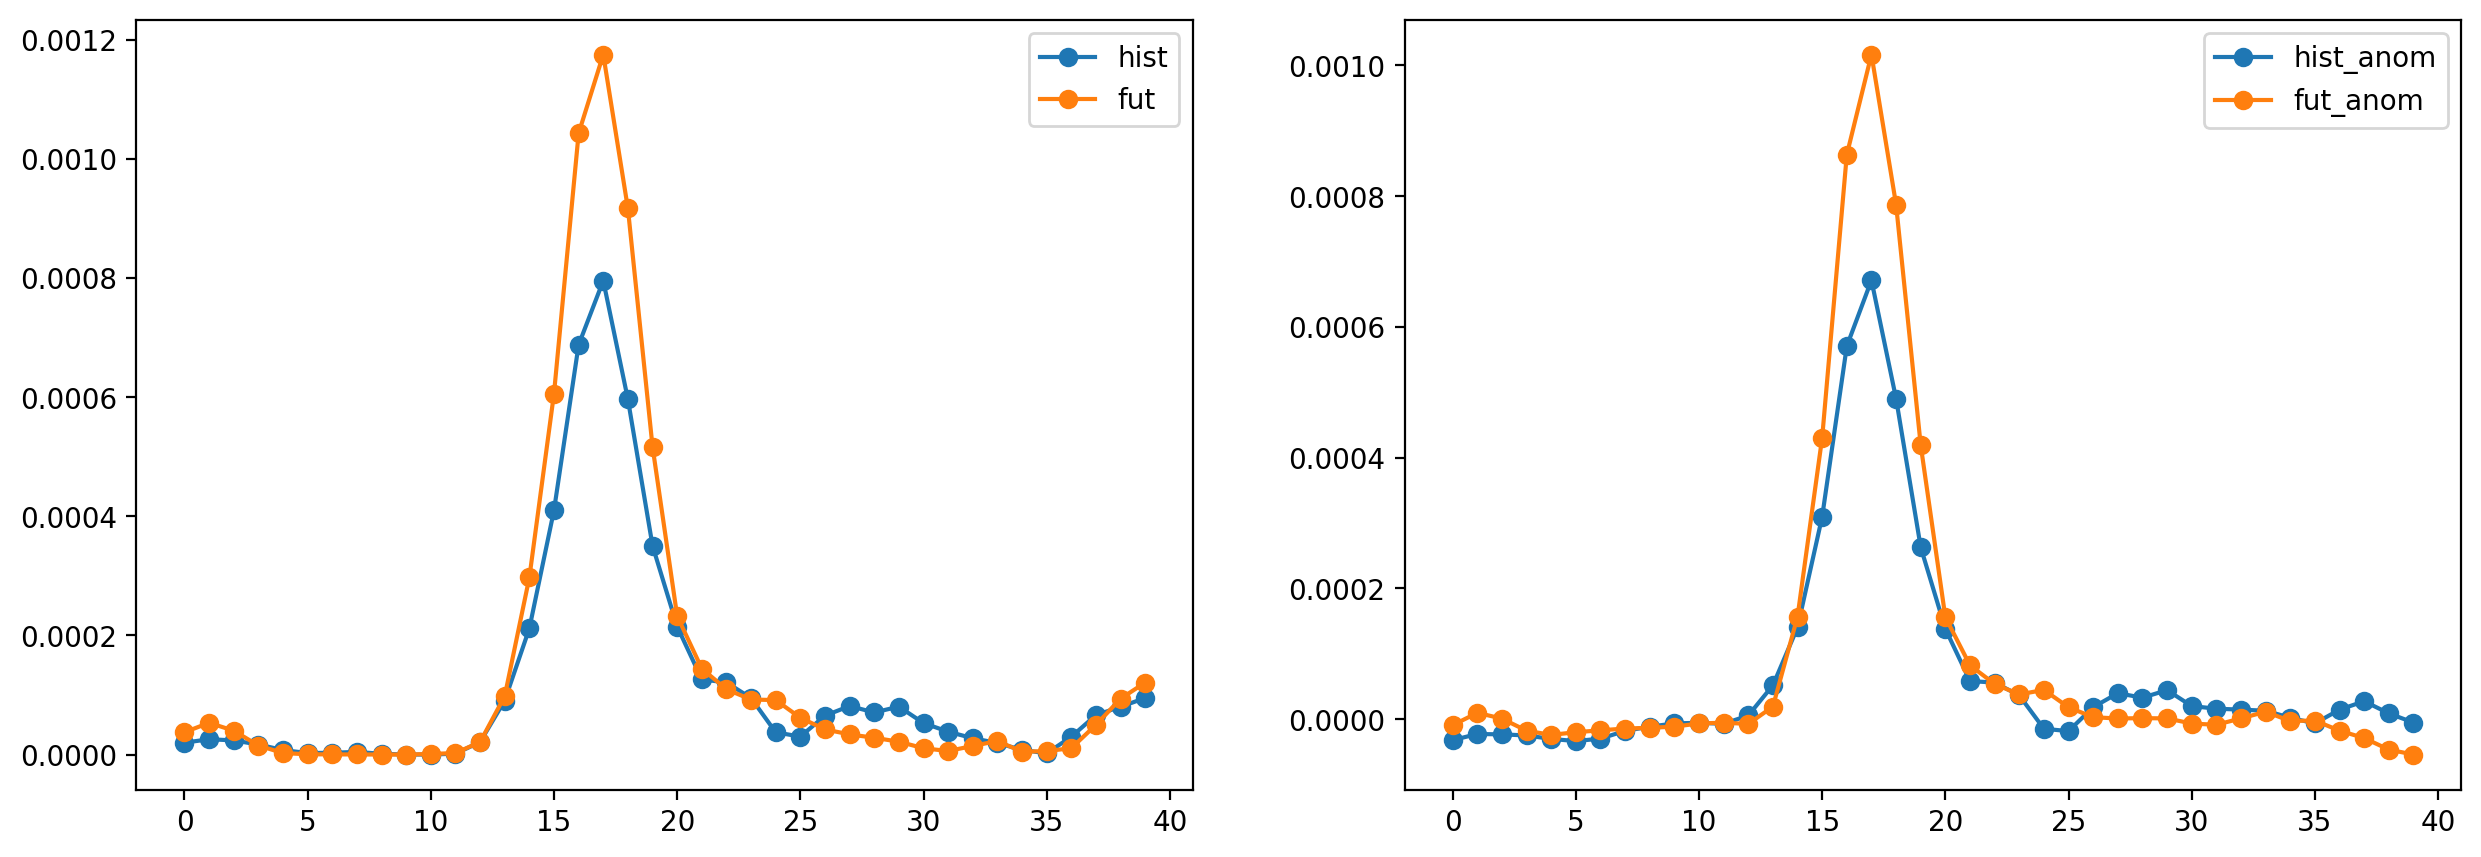

In [29]:
var = 'lsRain'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_timeseries_*_'+str(h)+'.p')[0], 'rb'))
anom = pkl.load(open(glob.glob(basefiles + var + '_anom_timeseries_*_'+str(h)+'.p')[0], 'rb'))
hist = np.mean(mean['CP4hist'], axis=0)[240:280]
fut = np.mean(mean['CP4fut'], axis=0)[240:280]
f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
plt.plot(hist, label='hist', marker='o')
plt.plot(fut, label='fut', marker='o')
plt.legend()


hist = np.mean(anom['CP4hist'], axis=0)[240:280]
fut = np.mean(anom['CP4fut'], axis=0)[240:280]
ax = f.add_subplot(122) 
plt.plot(hist, label='hist_anom', marker='o')
plt.plot(fut, label='fut_anom', marker='o')
plt.legend()

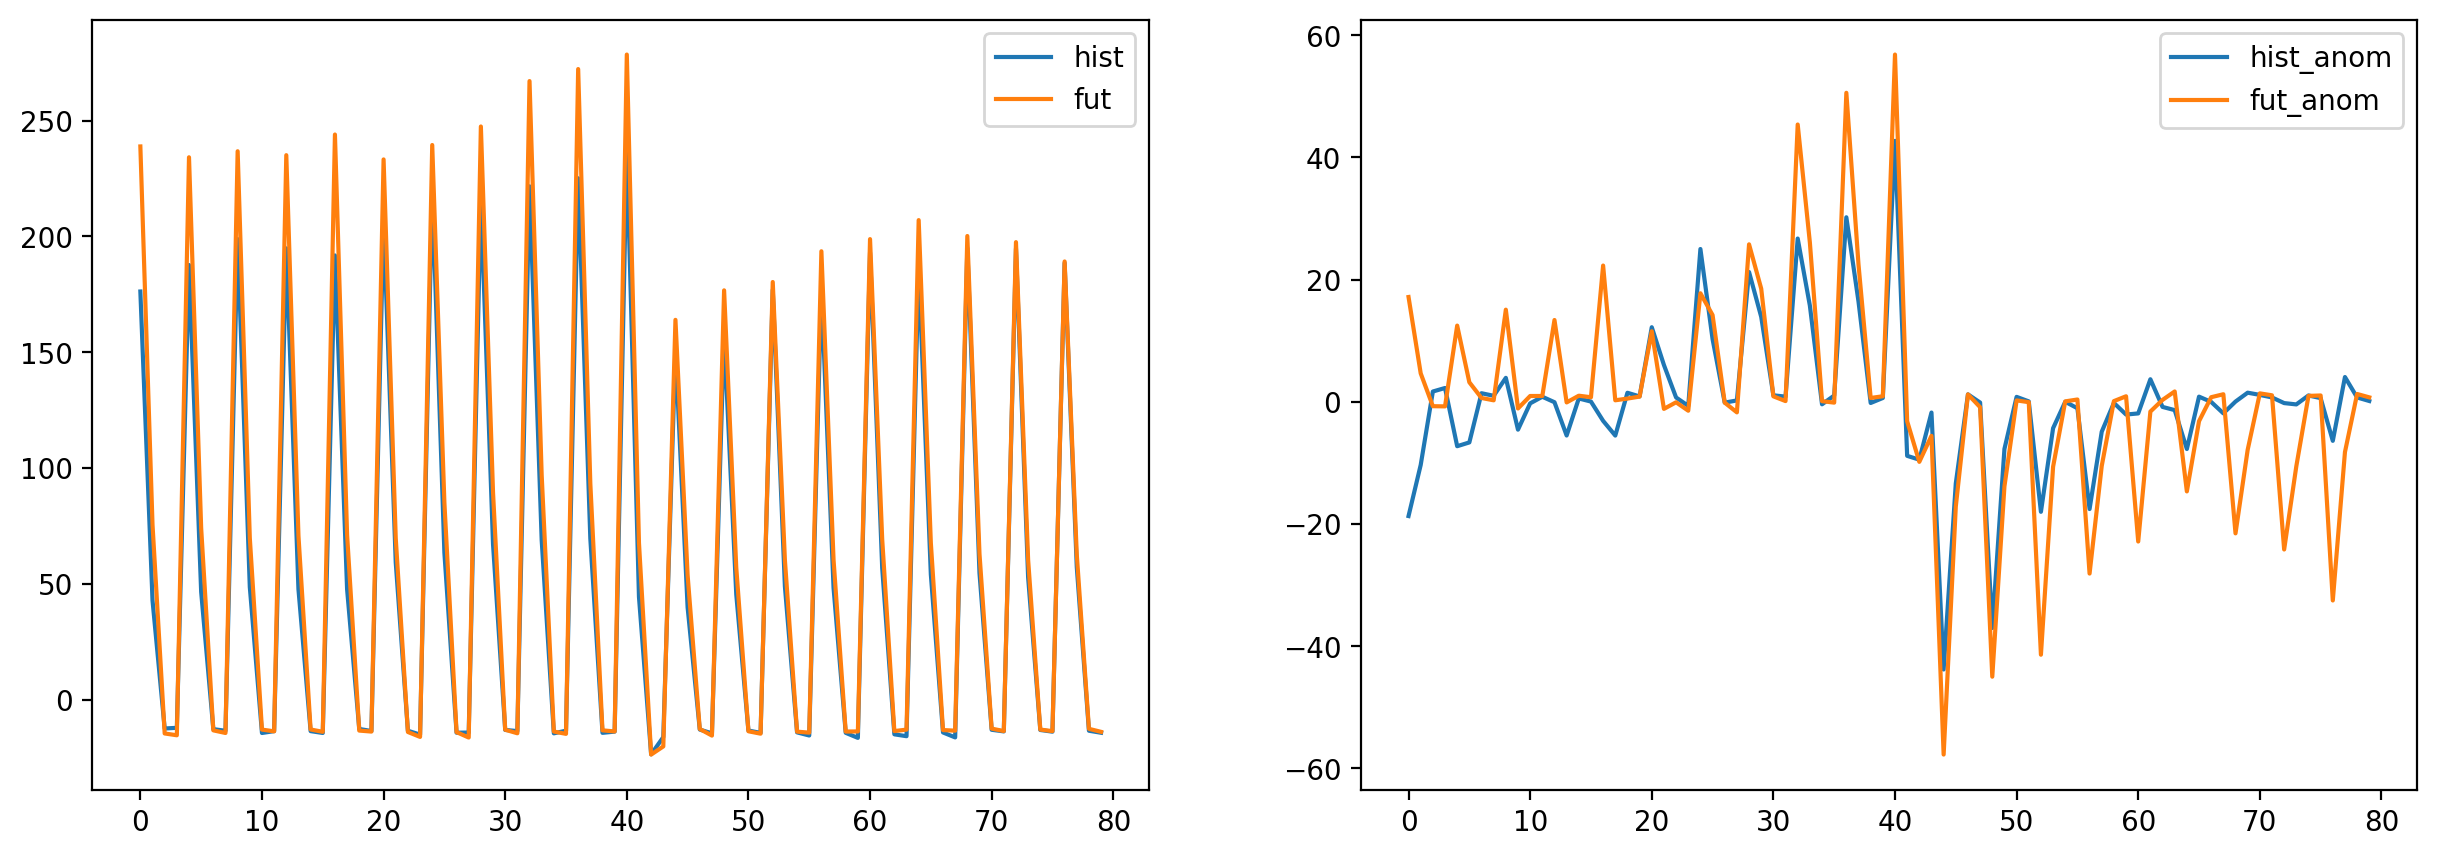

In [5]:
var = 'sh'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_timeseries_*_'+str(h)+'.p')[0], 'rb'))
anom = pkl.load(open(glob.glob(basefiles + var + '_anom_timeseries_*_'+str(h)+'.p')[0], 'rb'))
hist = np.mean(mean['CP4hist'], axis=0)
fut = np.mean(mean['CP4fut'], axis=0)
f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
plt.plot(hist, label='hist')
plt.plot(fut, label='fut')
plt.legend()


hist = np.mean(anom['CP4hist'], axis=0)
fut = np.mean(anom['CP4fut'], axis=0)
ax = f.add_subplot(122) 
plt.plot(hist, label='hist_anom')
plt.plot(fut, label='fut_anom')
plt.legend()

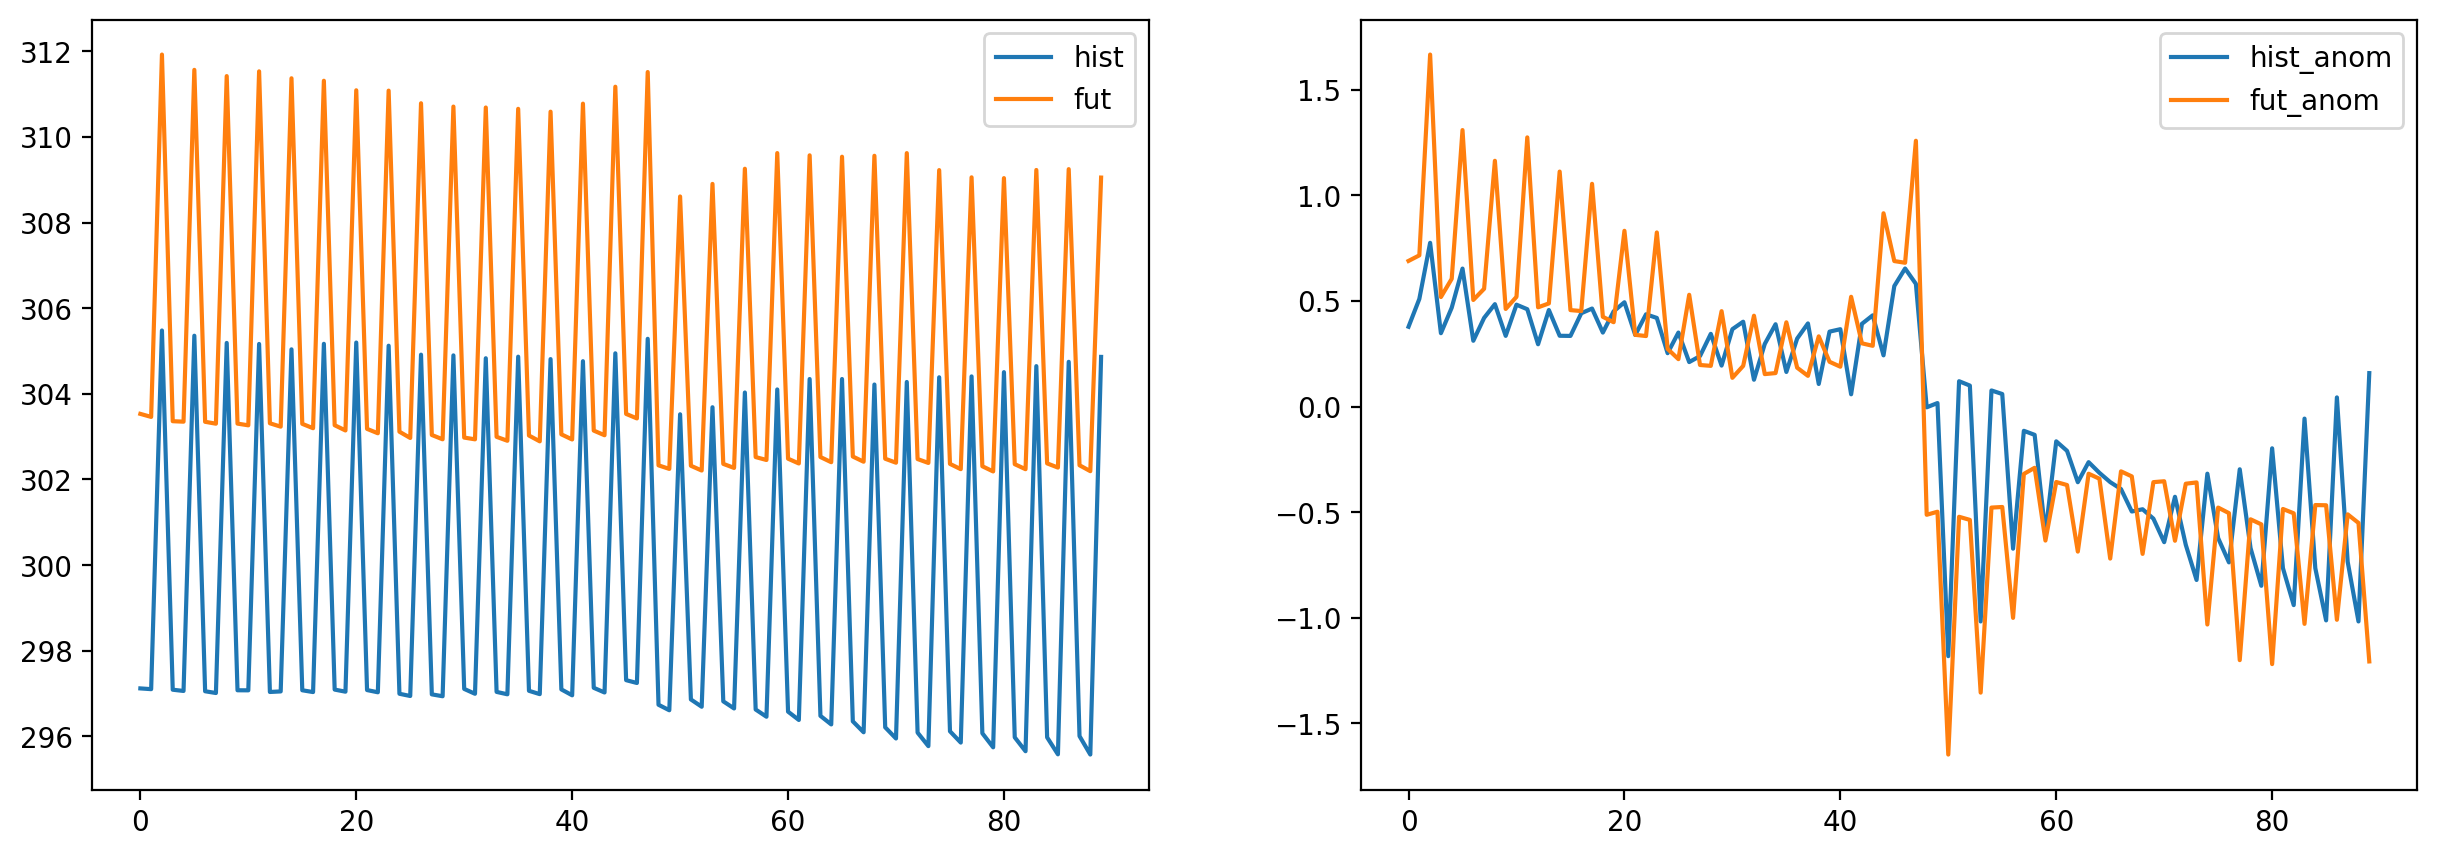

In [31]:
var = 't2'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_timeseries_*_'+str(h)+'.p')[0], 'rb'))
anom = pkl.load(open(glob.glob(basefiles + var + '_anom_timeseries_*_'+str(h)+'.p')[0], 'rb'))
hist = np.mean(mean['CP4hist'], axis=0)
fut = np.mean(mean['CP4fut'], axis=0)
f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
plt.plot(hist, label='hist')
plt.plot(fut, label='fut')
plt.legend()


hist = np.mean(anom['CP4hist'], axis=0)
fut = np.mean(anom['CP4fut'], axis=0)
ax = f.add_subplot(122) 
plt.plot(hist, label='hist_anom')
plt.plot(fut, label='fut_anom')
plt.legend()

/tmp/ipykernel_21375/2171891813.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(mean['scales'])
/tmp/ipykernel_21375/2171891813.py:14: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


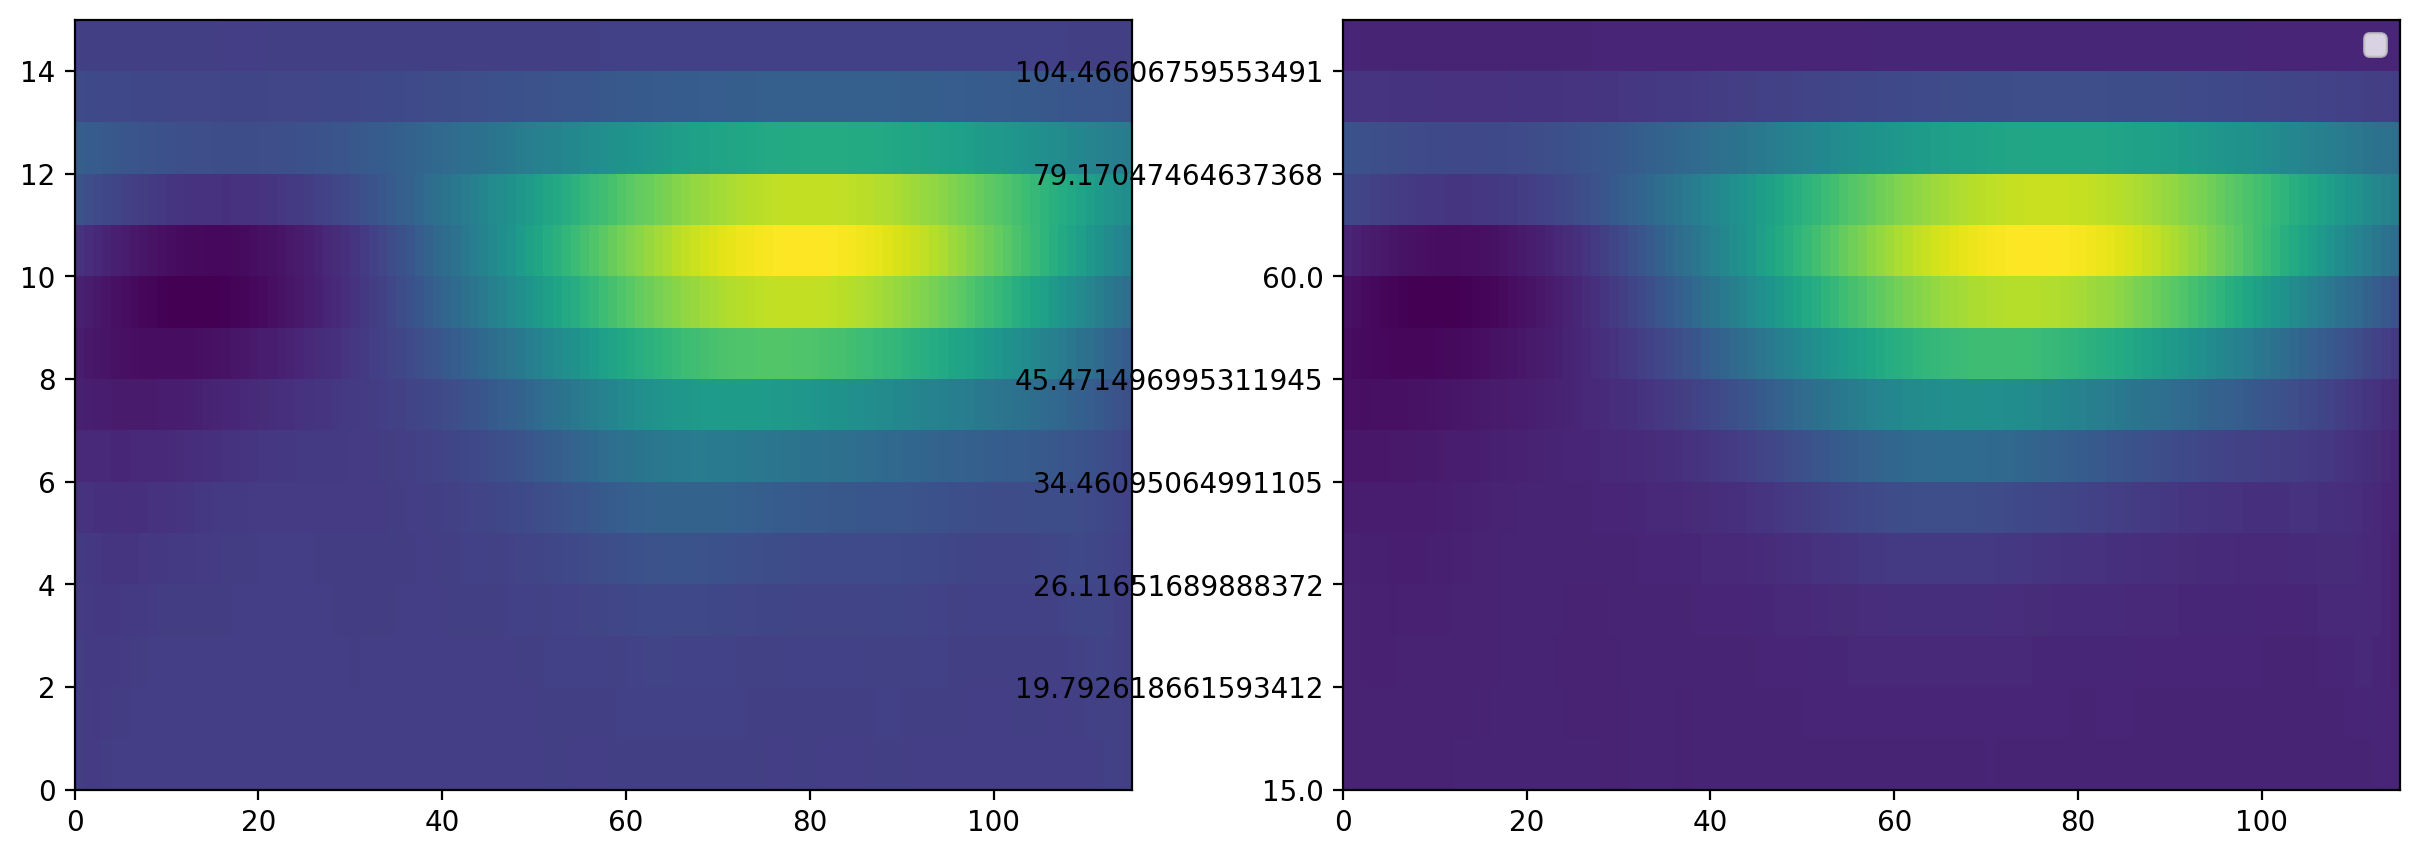

In [12]:
var = 't2'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_-11to11_'+str(h)+'.p')[0], 'rb'))

hist = np.nanmean(mean['CP4hist'], axis=0) #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0) #- np.nanmean(mean['CP4fut'])
f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
plt.pcolormesh(hist, label='hist')

ax = f.add_subplot(122) 
plt.pcolormesh(fut, label='fut')
ax.set_yticklabels(mean['scales'])
plt.legend()

12.0 48.0
99
135.76450198781714 271.5290039756343


Text(0, 0.5, 'Wavelet coefficient mean')

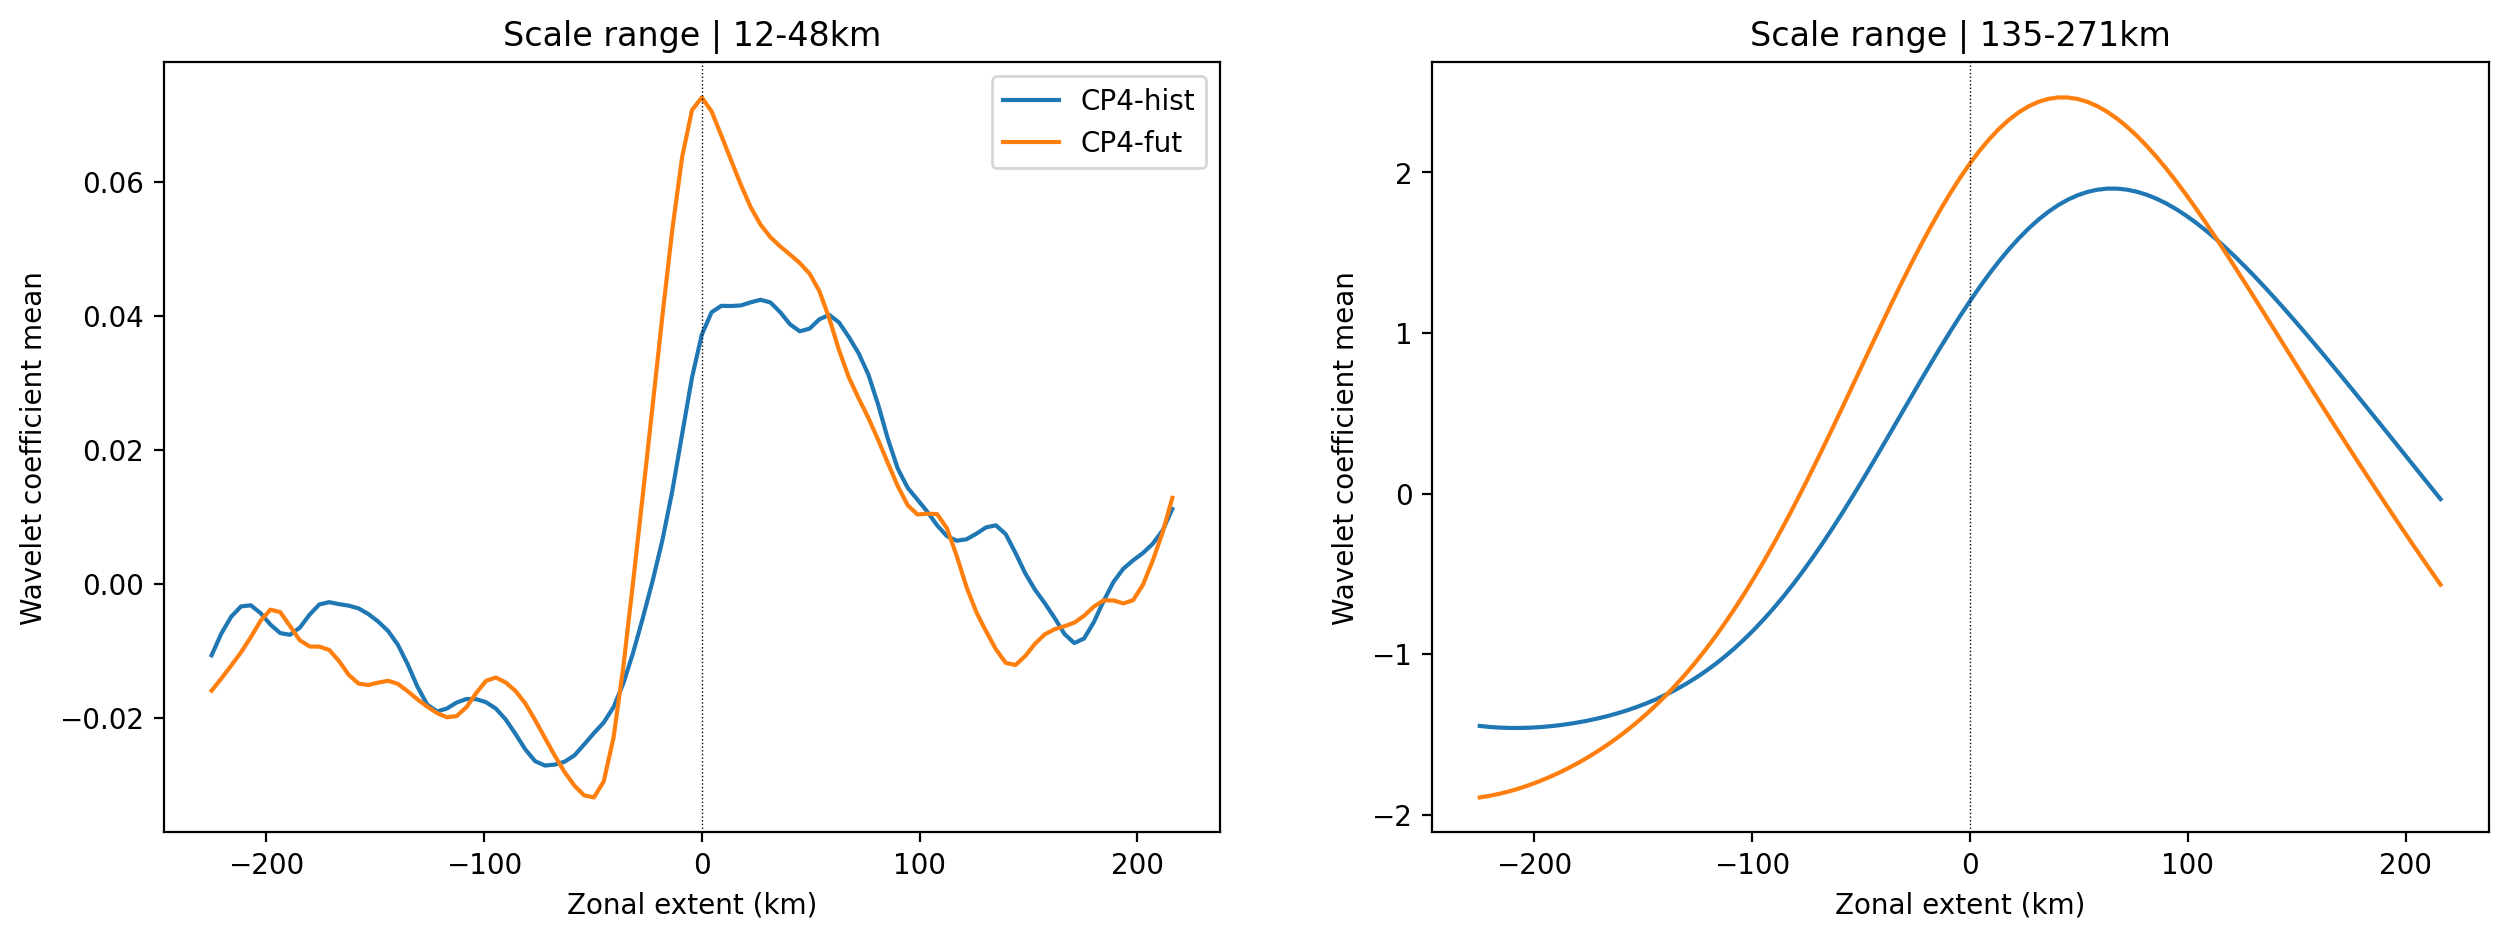

In [90]:
var = 't2'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_-11to11_'+str(h)+'_1d.p')[0], 'rb'))

hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
print(mean['scales'][0], mean['scales'][4])
histpart = hist[0:4,:].mean(axis=0)
futpart = fut[0:4,:].mean(axis=0) 
print(len(histpart))
hh = histpart#-histpart[0]
ff = futpart#-futpart[0]
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]

#ax.set_xticklabels()

plt.plot(plotrange[8:-8],hh, label='CP4-hist')
plt.plot(plotrange[8:-8],ff, label='CP4-fut')
plt.title('Scale range | '+str(int(mean['scales'][0]))+'-'+str(int(mean['scales'][4]))+'km') #'+str(hh.max()-hh.min())+' | '+str(ff.max()-ff.min()))
ax.axvline(0, linestyle='dotted', color='k', linewidth=0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Wavelet coefficient mean')
plt.legend()
    
 
ax = f.add_subplot(122)
    
histpart = hist[-4:-2,:].mean(axis=0)
futpart = fut[-4:-2,:].mean(axis=0)

print(mean['scales'][-4], mean['scales'][-2])

hh = histpart#-histpart[0]
ff = futpart#-futpart[0]

plt.plot(plotrange[8:-8],hh)
plt.plot(plotrange[8:-8],ff)
plt.title('Scale range | '+str(int(mean['scales'][-4]))+'-'+str(int(mean['scales'][-2]))+'km') #'+str(hh.max()-hh.min())+' | '+str(ff.max()-ff.min()))
ax.axvline(0, linestyle='dotted', color='k', linewidth=0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Wavelet coefficient mean')

Text(0, 0.5, 'Contribution to total power (%)')

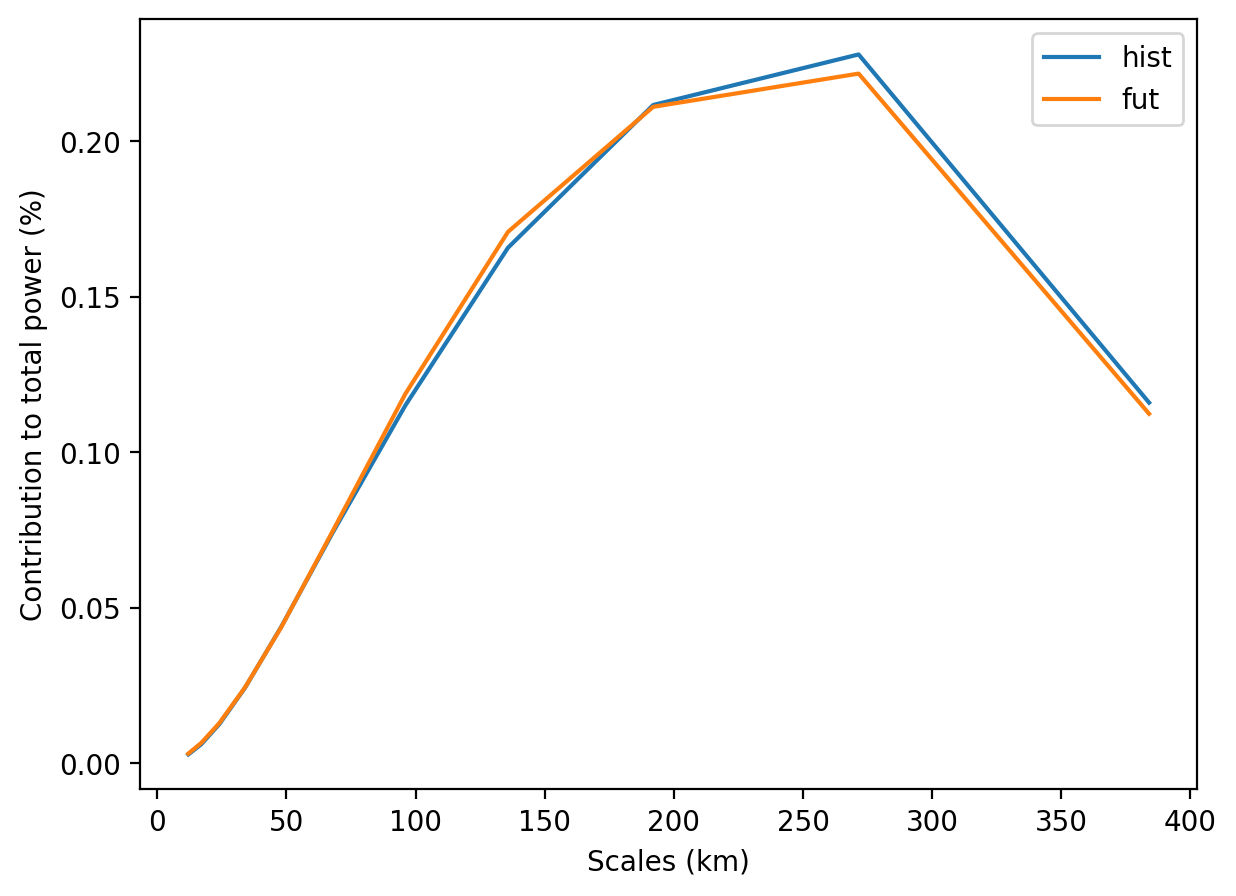

In [95]:
var = 't2'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_1d.p')[0], 'rb'))
scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_-11to11_'+str(h)+'_1d.p')[0], 'rb'))['scales']

hist = np.abs(np.array(mean['CP4hist'])[:,:,58]) #- np.nanmean(mean['CP4hist'])
fut = np.abs(np.array(mean['CP4fut'])[:,:,58]) #- np.nanmean(mean['CP4fut'])

f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
plt.plot(scales, np.sum((hist), axis=0)/np.sum((hist)), label='hist')
plt.plot(scales, np.sum((fut), axis=0)/np.sum((fut)), label='fut')
plt.legend()
ax.set_xlabel('Scales (km)')
ax.set_ylabel('Contribution to total power (%)')

Text(0, 0.5, 'Contribution to total power (%)')

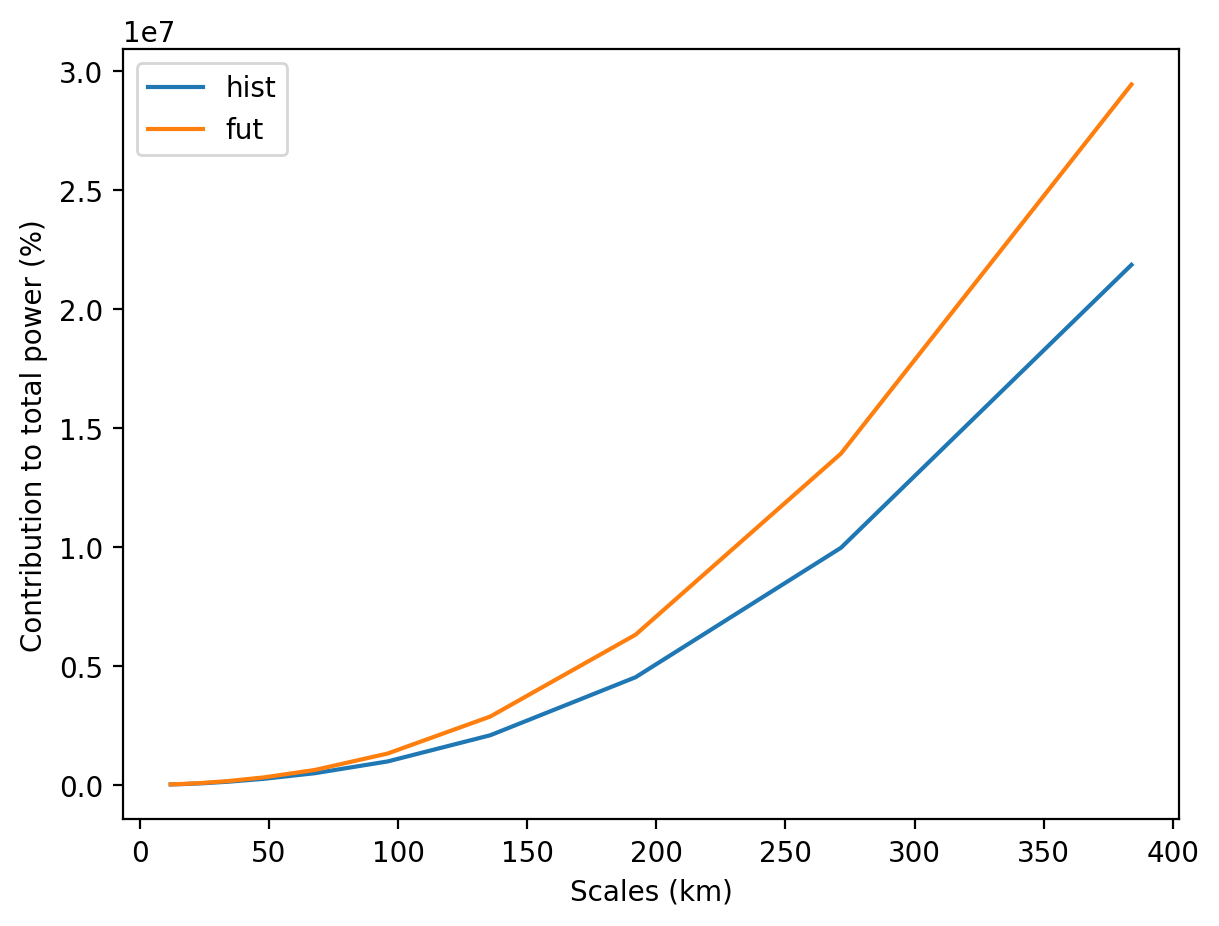

In [105]:
var = 'sh'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+'.p')[0], 'rb'))
#scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
hist = np.array(mean['CP4hist'])
shapes = hist.shape
hist = hist.reshape((shapes[0],shapes[1],shapes[2]*shapes[3])).mean(axis=(0,2))#sum(axis=0).sum(axis=1)
fut = np.array(mean['CP4fut'])
fut = fut.reshape((shapes[0],shapes[1],shapes[2]*shapes[3])).mean(axis=(0,2))#.sum(axis=0).sum(axis=1)

f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
plt.plot(scales, hist, label='hist')
plt.plot(scales, fut, label='fut')
plt.legend()
ax.set_xlabel('Scales (km)')
ax.set_ylabel('Contribution to total power (%)')